In [68]:
import pandas as pd

In [69]:
df=pd.read_csv('BlackFriday.csv')

In [70]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.shape

(537577, 12)

In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

<Axes: >

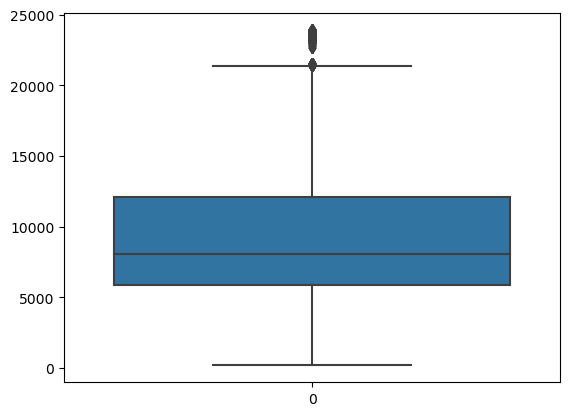

In [8]:
import seaborn as sns
sns.boxplot(df['Purchase'])

# Data cleaning

### Dealing with null values

we have null value in cat 1 and cat2 166986 and 373299 respectively if we take % cat1=166986/537577= 31% of null value
 and cat 2=373299/537577=69.4% of null value if we delete rows we will loose major data set and so we can remove those 2 coulumns for further analysis

In [109]:
del df['Product_Category_2']
del df['Product_Category_3']

In [10]:
df.shape

(537577, 10)

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Analysing all coolumns

In [12]:
#if we want to know unique values of all columns
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Purchase                      17959
dtype: int64

In [13]:
# to display all unique value
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [14]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

In [15]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [16]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [18]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [21]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [22]:
print('total amount spent by users on sale ',df['Purchase'].sum())

total amount spent by users on sale  5017668378


In [23]:
print('avg amount spent on each item',df['Purchase'].sum()/len(df['Purchase']))

avg amount spent on each item 9333.859852635065


In [24]:
for column in df.columns:
    print(column, ':' ,df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


### Analyzing gender

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [26]:
df[df['Gender']=='M'].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [27]:
len(df[df['Gender']=='M'])

405380

In [28]:
len(df[df['Gender']=='F'])

132197

In [29]:
#showing the result in pie chart
data=pd.DataFrame({'Ratio' :[len(df[df['Gender']=='M']) ,len(df[df['Gender']=='F'])] } , index=['Male', 'Female'])

In [30]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

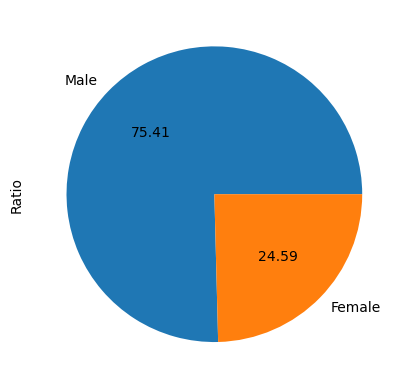

In [31]:
data['Ratio'].plot(kind='pie' , autopct='%0.2f')

<Axes: ylabel='Ratio'>

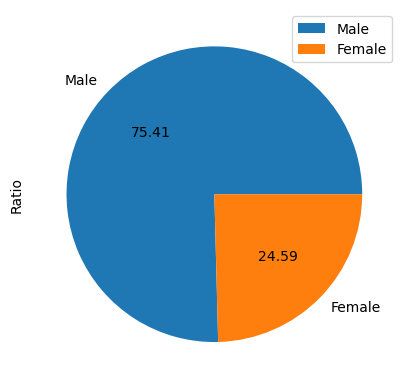

In [32]:
data.plot.pie(y='Ratio', autopct='%0.2f')

<Axes: title={'center': 'Gender ratio'}>

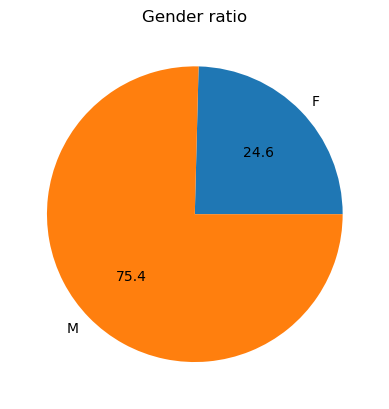

In [33]:
df.groupby('Gender').size().plot(kind='pie', autopct='%0.1f' ,title='Gender ratio')

<Axes: xlabel='Gender'>

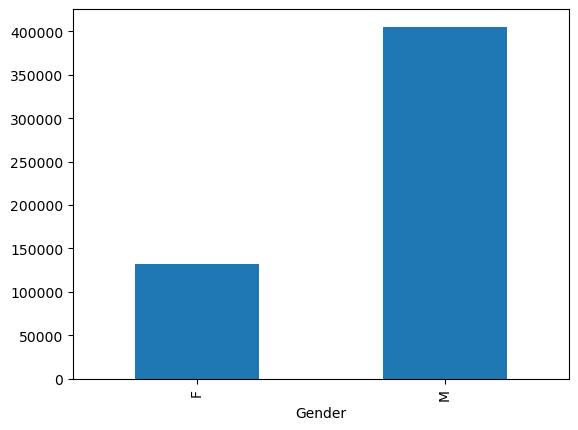

In [34]:
df.groupby('Gender').size().plot(kind='bar')

<Axes: ylabel='Purchase'>

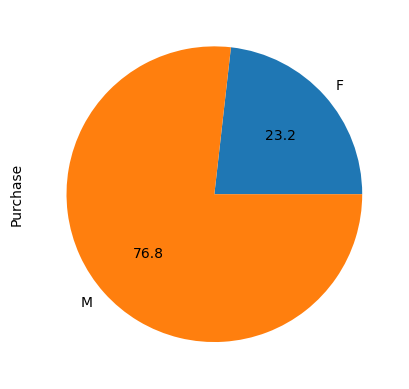

In [76]:
#analysing amount spend

df.groupby('Gender').sum()['Purchase'].plot(kind='pie', autopct='%0.1f')

<Axes: ylabel='Purchase'>

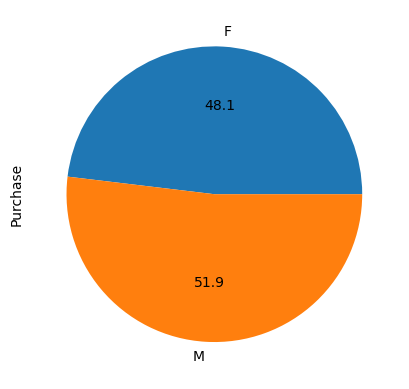

In [80]:
# finding the avg money spend per purchase on gender basis

df.groupby('Gender')['Purchase'].mean().plot(kind='pie', autopct='%0.1f')

### Analyzing age and marital status

In [44]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [38]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase distribution based on age'}, xlabel='Age'>

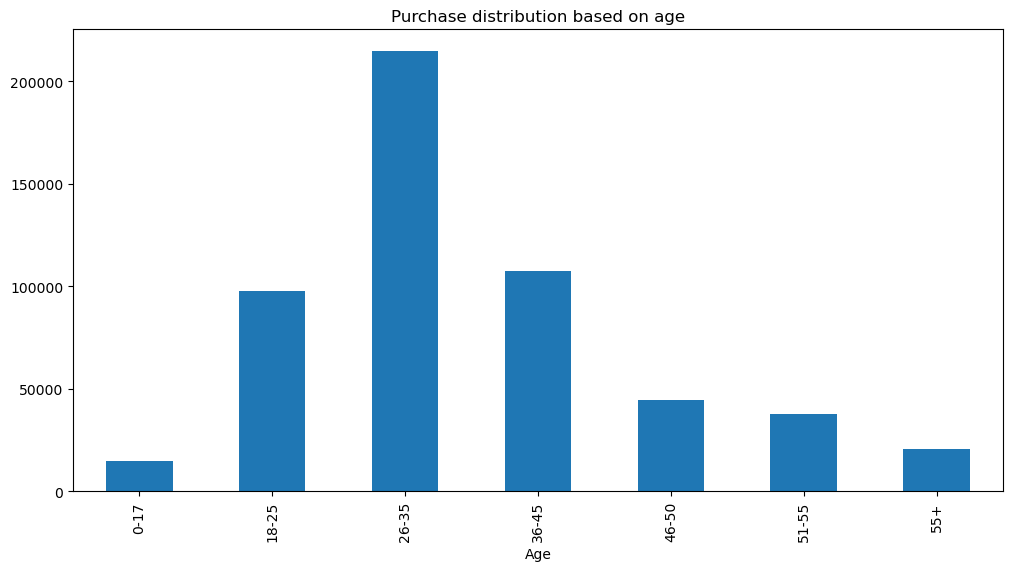

In [42]:
df.groupby('Age').size().plot(kind='bar' , figsize=(12,6), title='Purchase distribution based on age')

In [46]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [53]:
# to check the unique products purchased with the age range

lst=[]
for i in df['Age'].unique():
    lst.append([i, df[df['Age']==i]['Product_ID'].nunique()])
data=pd.DataFrame(lst , columns=['Age' , 'No_of_Unique_Products'])

data

,Age,No_of_Unique_Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: title={'center': 'unique product based on age segment'}, xlabel='Age'>

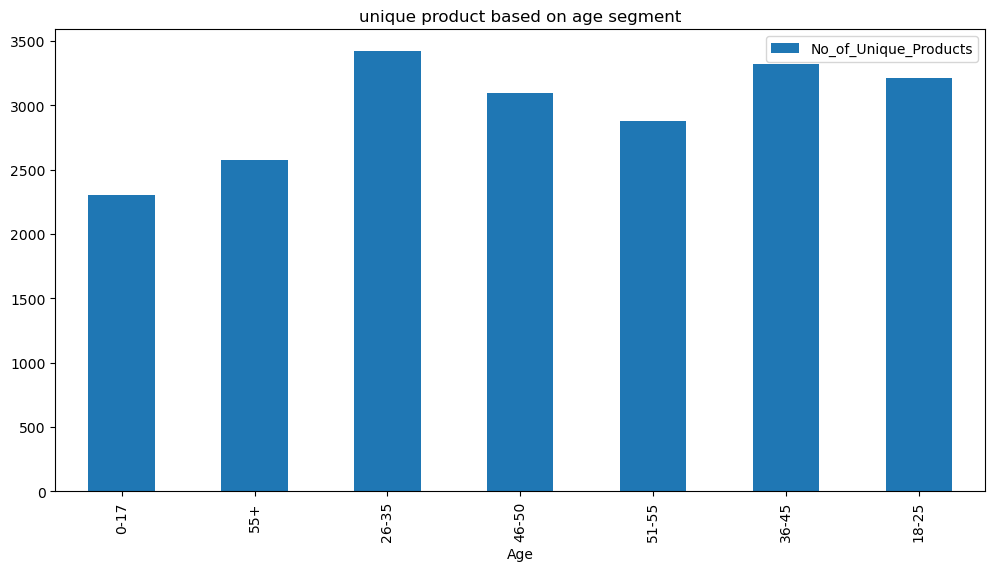

In [57]:
data.plot.bar(x='Age', figsize=(12,6) , title='unique product based on age segment')

<Axes: title={'center': 'Amount spend by age'}, xlabel='Age'>

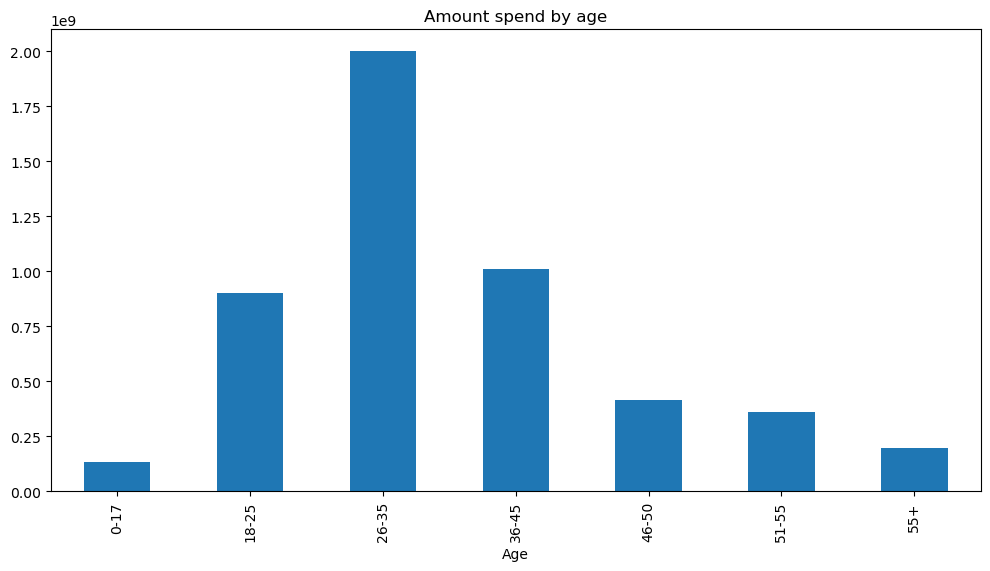

In [60]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar' , figsize=(12,6), title='Amount spend by age')

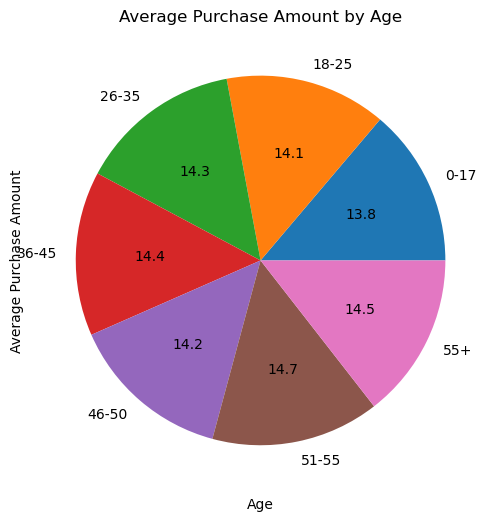

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_data.csv')

# Group by 'Age' and calculate the mean purchase amount
average_purchase_by_age = df.groupby('Age')['Purchase'].mean()

# Create bar plot
plt.figure(figsize=(12, 6))
average_purchase_by_age.plot(kind='pie' , autopct='%0.1f')
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Analysing maritial status

In [65]:
df['Marital_Status'].nunique()

2

<Axes: >

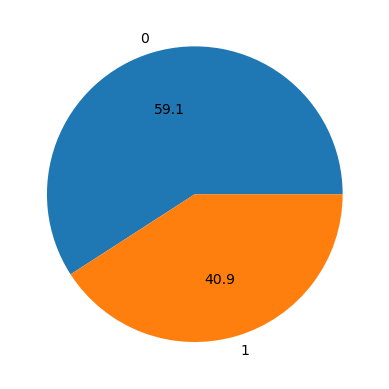

In [66]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

### Multi column analysis

In [81]:
import seaborn as sns

In [111]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


<Axes: xlabel='Age', ylabel='count'>

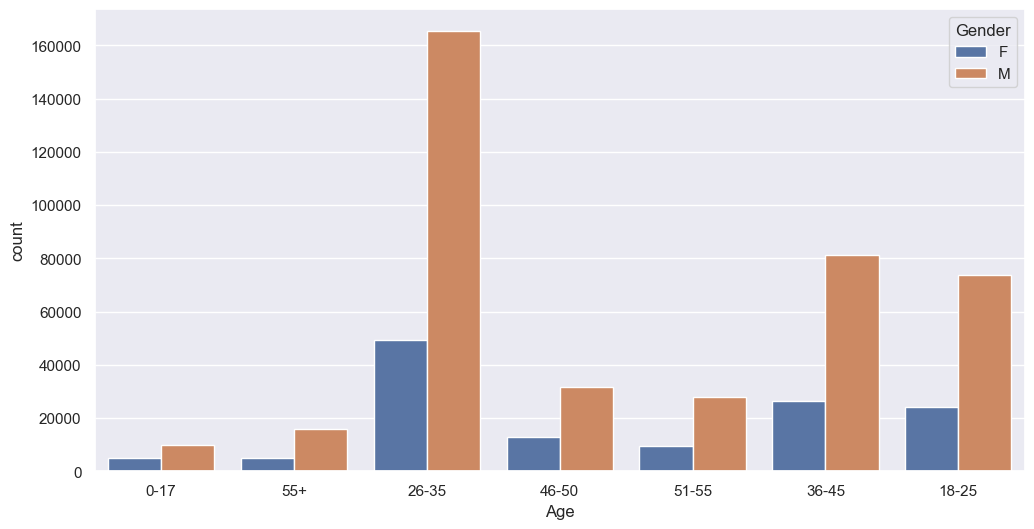

In [84]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df , x='Age', hue='Gender' )

<Axes: xlabel='Gender', ylabel='count'>

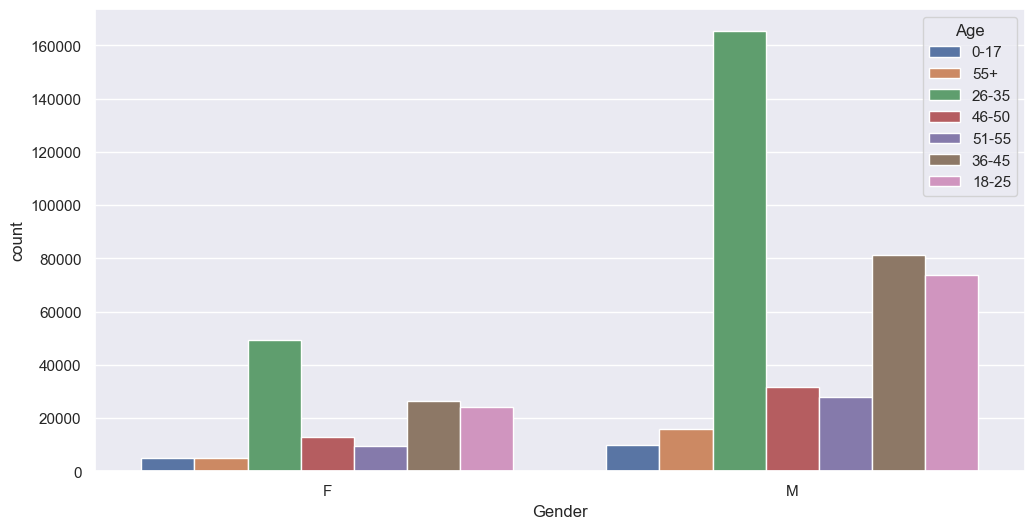

In [85]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=df , x='Gender', hue='Age' )

<Axes: xlabel='Gender', ylabel='count'>

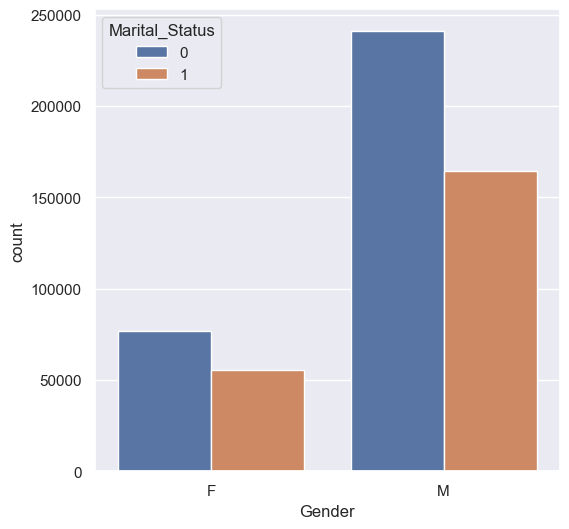

In [90]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(data=df , x='Gender', hue='Marital_Status' )

<Axes: xlabel='City_Category', ylabel='count'>

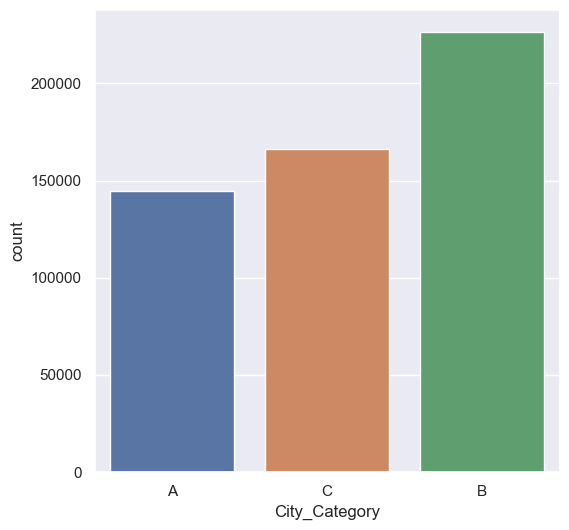

In [92]:
sns.countplot(x=df['City_Category'])

<Axes: >

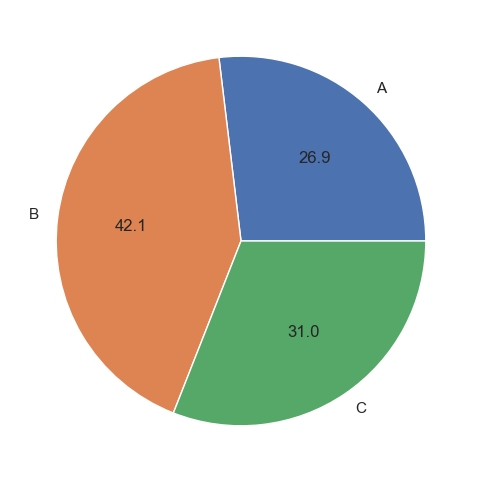

In [93]:
df.groupby('City_Category').size().plot(kind='pie' , autopct='%0.1f')

<Axes: xlabel='City_Category', ylabel='count'>

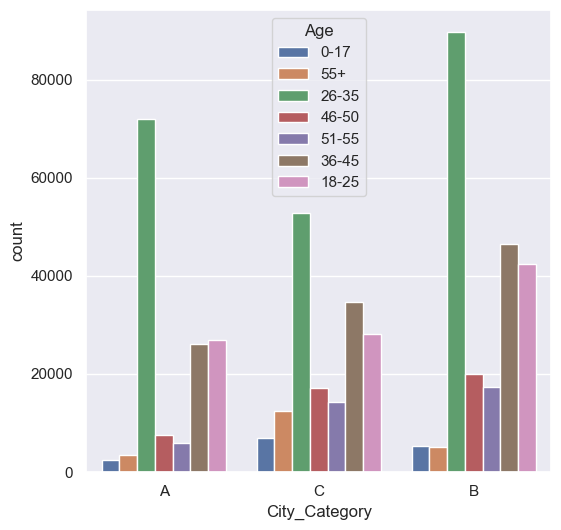

In [95]:
sns.countplot(x='City_Category' , hue='Age', data=df)

<Axes: xlabel='Age', ylabel='count'>

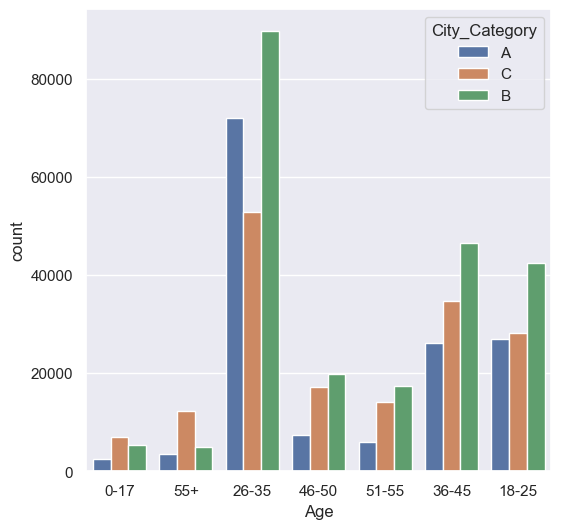

In [97]:
sns.countplot(x='Age' , hue='City_Category', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

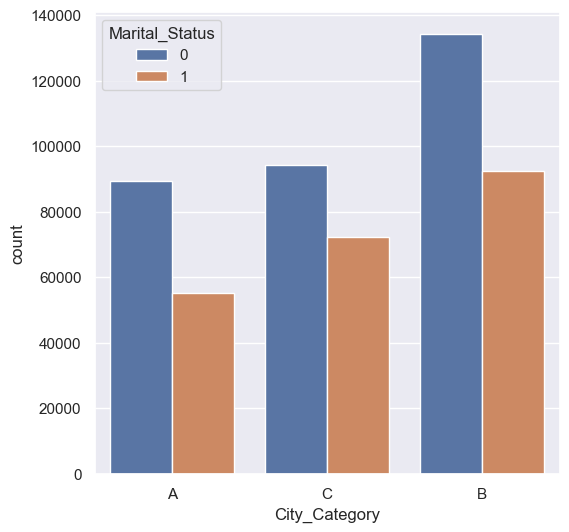

In [98]:
sns.countplot(data=df , x='City_Category' ,hue='Marital_Status')

<Axes: xlabel='City_Category', ylabel='count'>

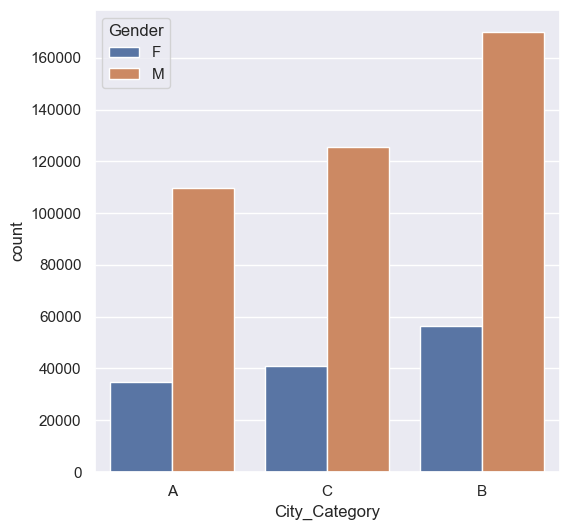

In [103]:
sns.countplot(data=df , x='City_Category' ,hue='Gender')

<Axes: ylabel='Purchase'>

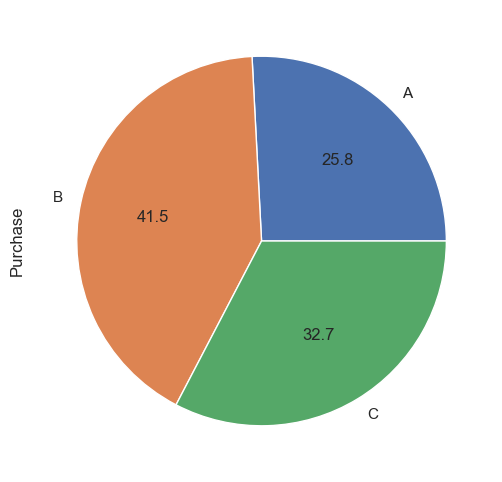

In [106]:
df.groupby('City_Category')['Purchase'].sum().plot(kind='pie', autopct='%0.1f')

<Axes: ylabel='Purchase'>

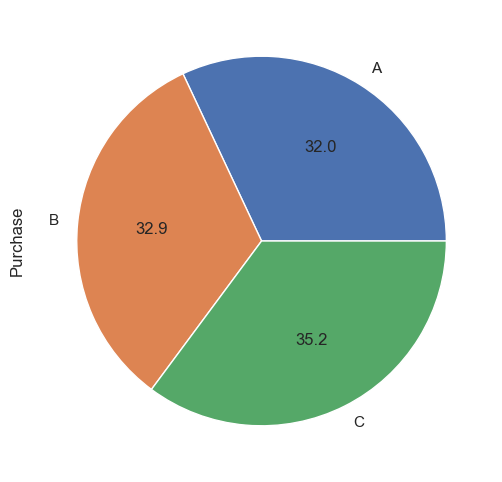

In [107]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie', autopct='%0.1f')

In [110]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

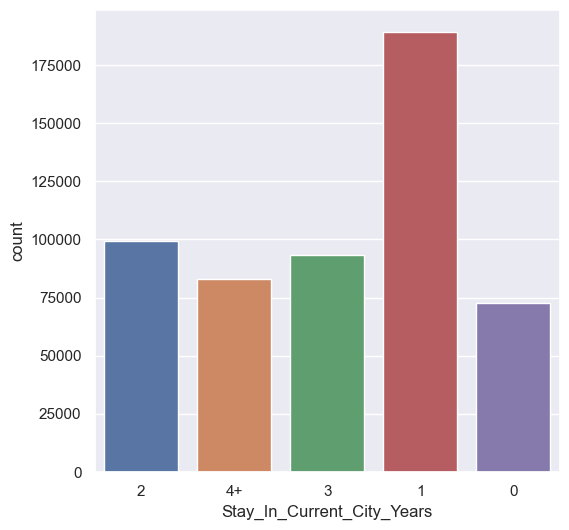

In [112]:
sns.countplot(data=df , x='Stay_In_Current_City_Years')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

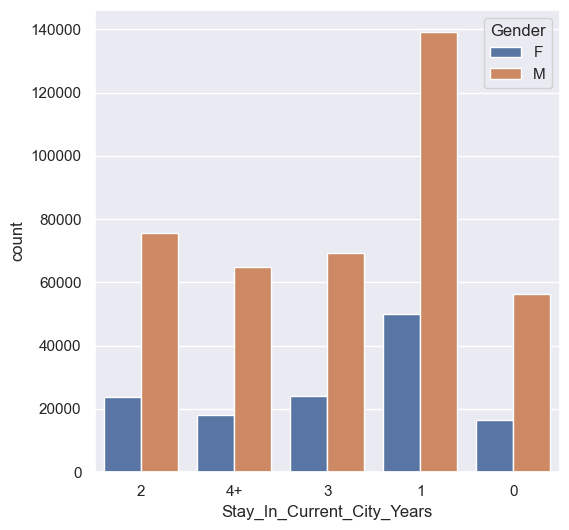

In [113]:
sns.countplot(data=df , x='Stay_In_Current_City_Years', hue='Gender')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

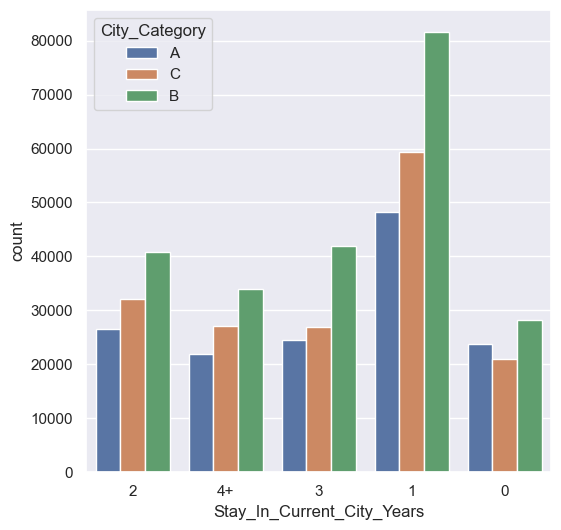

In [115]:
sns.countplot(data=df , x='Stay_In_Current_City_Years', hue='City_Category')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

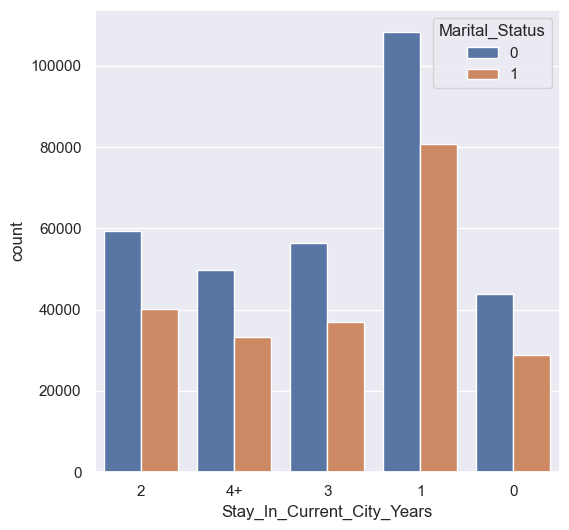

In [116]:
sns.countplot(data=df , x='Stay_In_Current_City_Years', hue='Marital_Status')

<Axes: title={'center': 'category based on Stay_In_Current_City_Years'}>

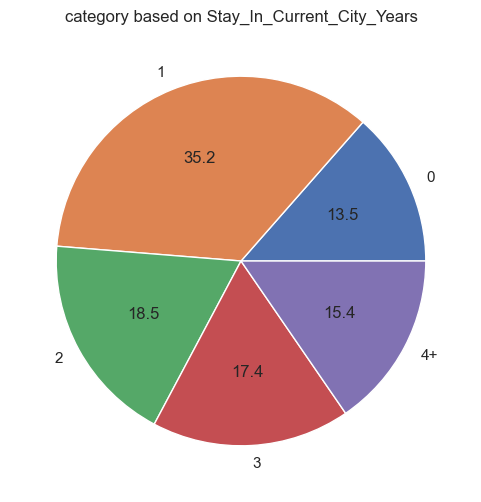

In [118]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie' , autopct='%0.1f' , title='category based on Stay_In_Current_City_Years')

<Axes: title={'center': 'Total purchased ob basis ofStay_In_Current_City_Years'}, ylabel='Purchase'>

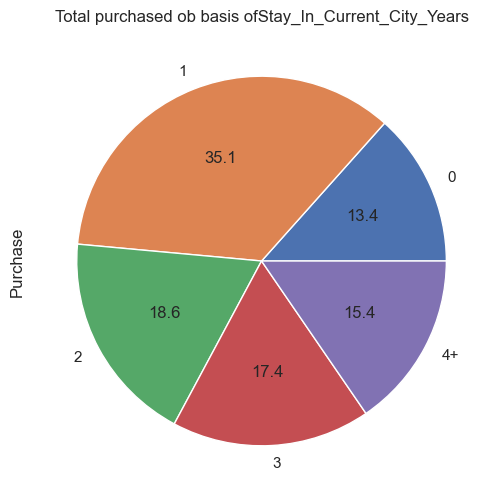

In [119]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind='pie' , autopct='%0.1f' , title='Total purchased ob basis ofStay_In_Current_City_Years')

<Axes: title={'center': 'Avg spent on item based on Stay_In_Current_City_Years'}, ylabel='Purchase'>

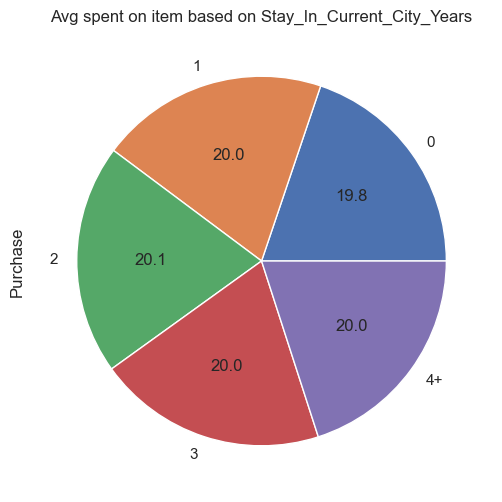

In [120]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='pie' , autopct='%0.1f' , title='Avg spent on item based on Stay_In_Current_City_Years')

### Occupation and products analysis

In [121]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


In [122]:
df['Occupation'].nunique()

21

<Axes: xlabel='Occupation', ylabel='count'>

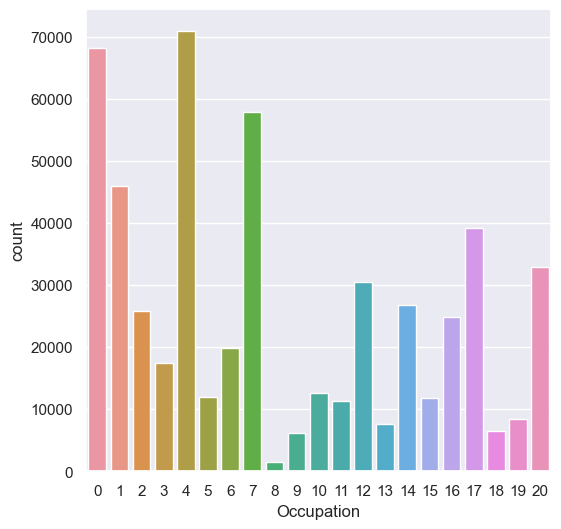

In [130]:
sns.countplot(data=df , x='Occupation')

<Axes: xlabel='Occupation'>

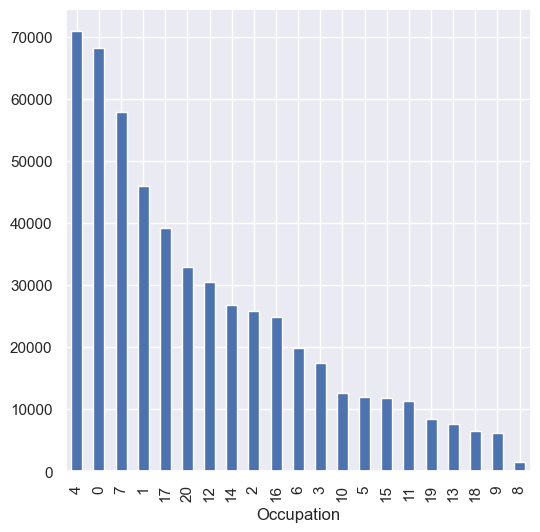

In [132]:
df.groupby('Occupation').size().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Occupation'>

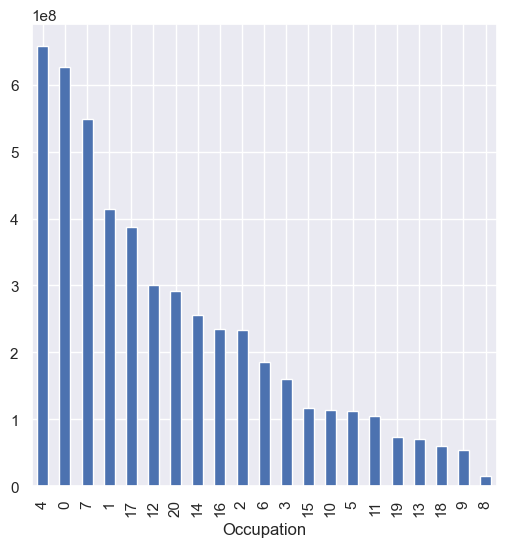

In [133]:
df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Occupation'>

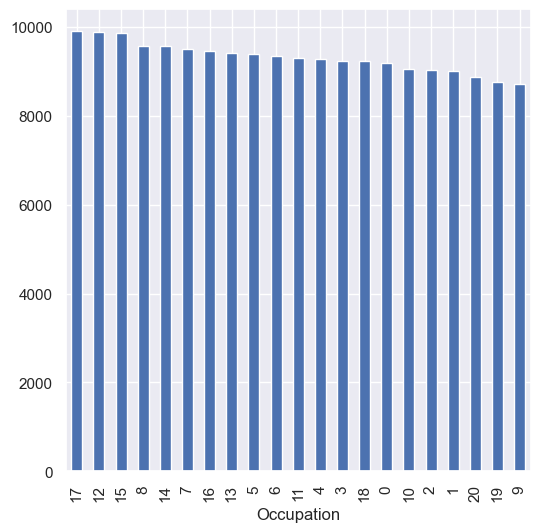

In [134]:
df.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False).plot(kind='bar')

#17 job role purchases more expensive product

In [136]:
df.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

Occupation
17    9906.378997
12    9883.052460
15    9866.239925
8     9576.508530
14    9568.536426
7     9502.175276
16    9457.133118
13    9424.449391
5     9388.848978
6     9336.378620
11    9299.467190
4     9279.026742
3     9238.077277
18    9233.671418
0     9186.946726
10    9052.836410
2     9025.938982
1     9017.703095
20    8881.099514
19    8754.249162
9     8714.335934
Name: Purchase, dtype: float64

<Axes: xlabel='Occupation', ylabel='count'>

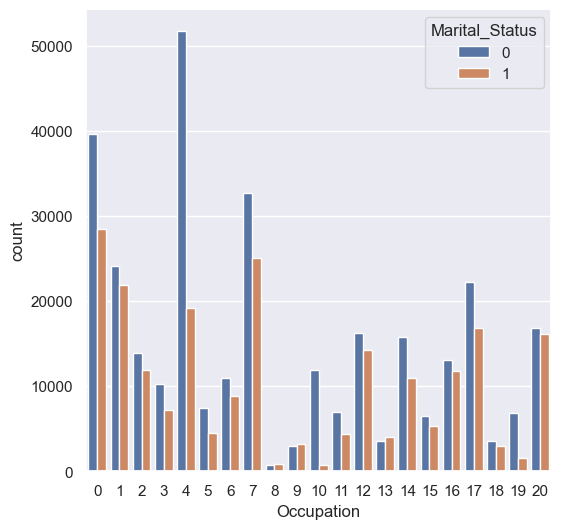

In [139]:
sns.countplot(data=df ,x='Occupation' , hue='Marital_Status')

<Axes: xlabel='Occupation'>

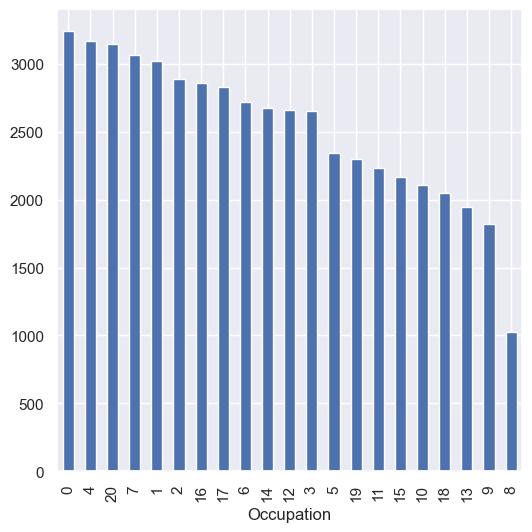

In [141]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

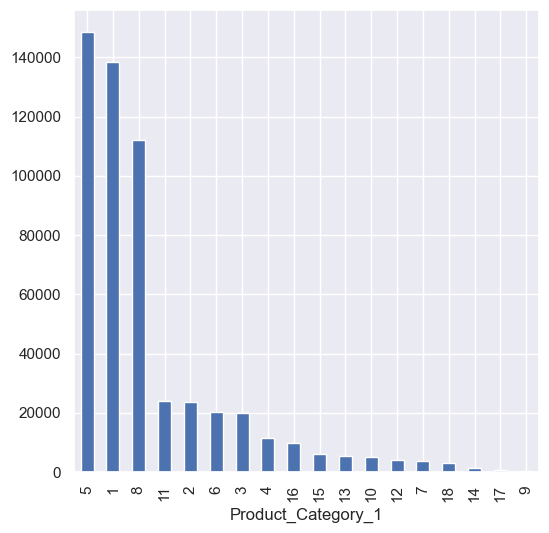

In [144]:
df.groupby('Product_Category_1').size().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

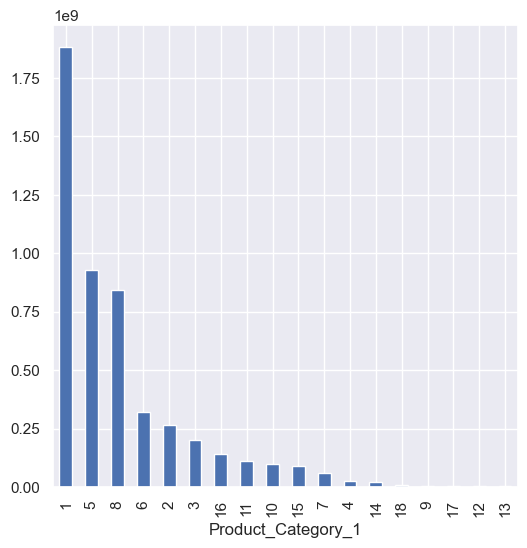

In [145]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

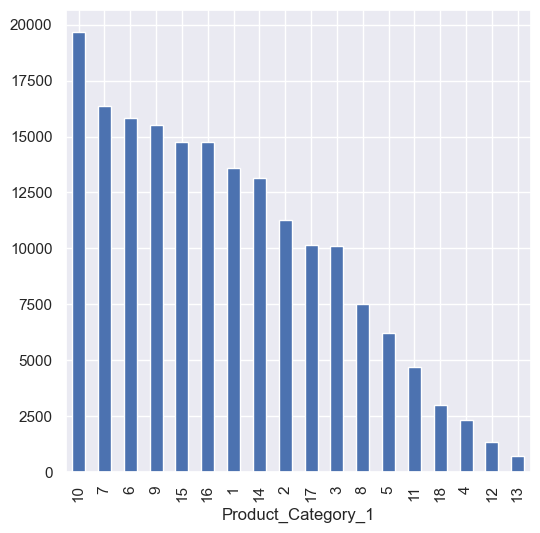

In [146]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_ID'>

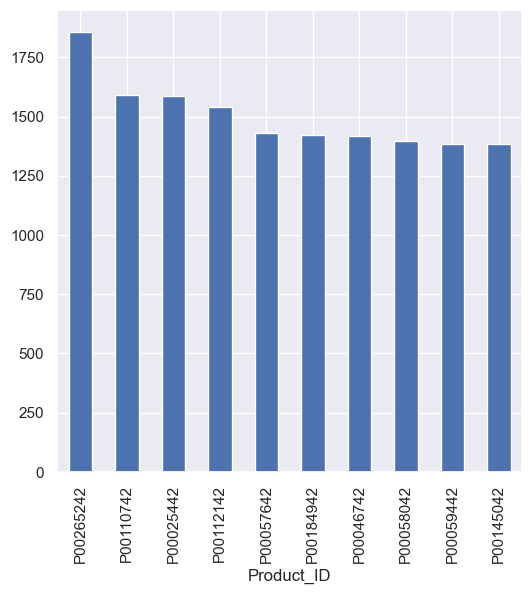

In [149]:
df.groupby('Product_ID').size().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_ID'>

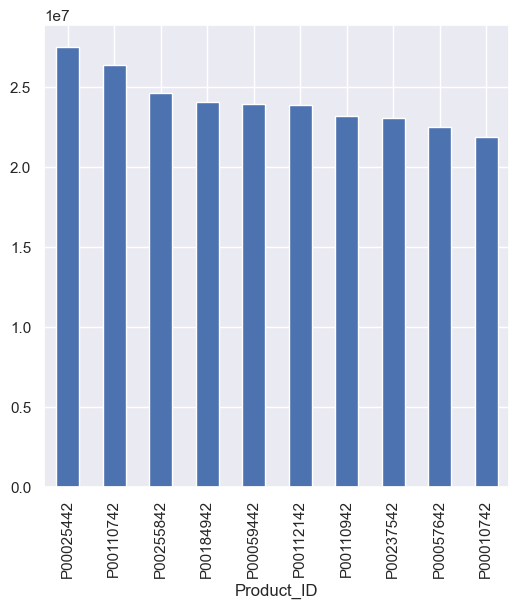

In [150]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_ID'>

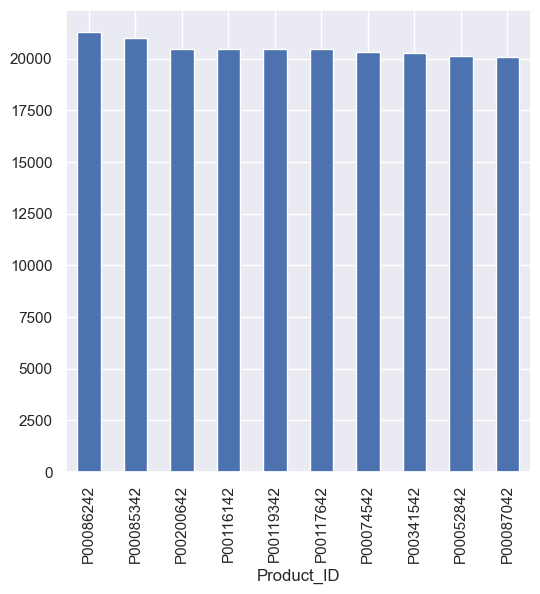

In [151]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

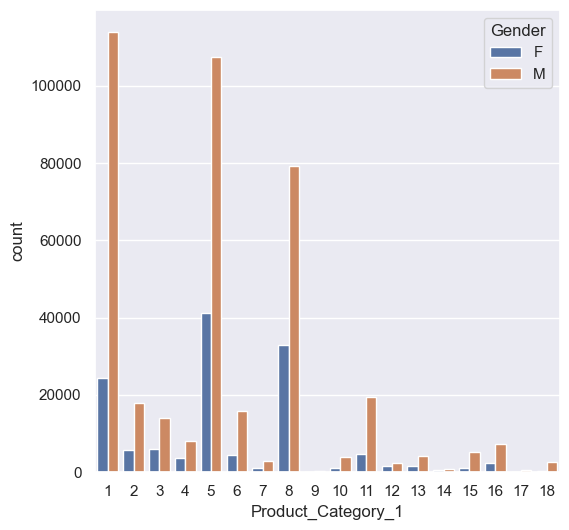

In [152]:
sns.countplot(data=df ,x='Product_Category_1', hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='count'>

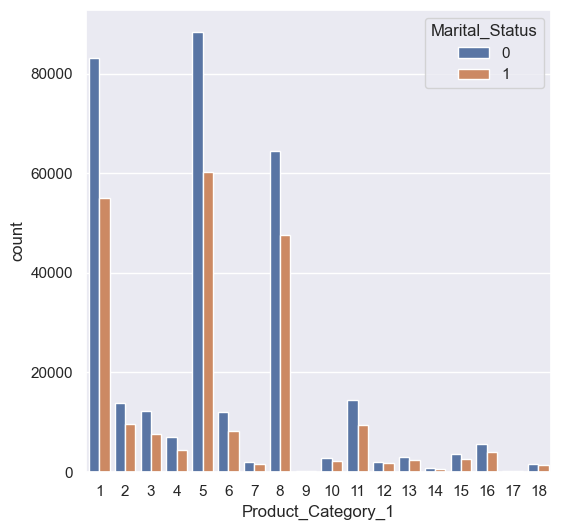

In [153]:
sns.countplot(data=df ,x='Product_Category_1', hue='Marital_Status')

### Combining marital status and gender

In [158]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [159]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0


<Axes: xlabel='MaritalGender', ylabel='count'>

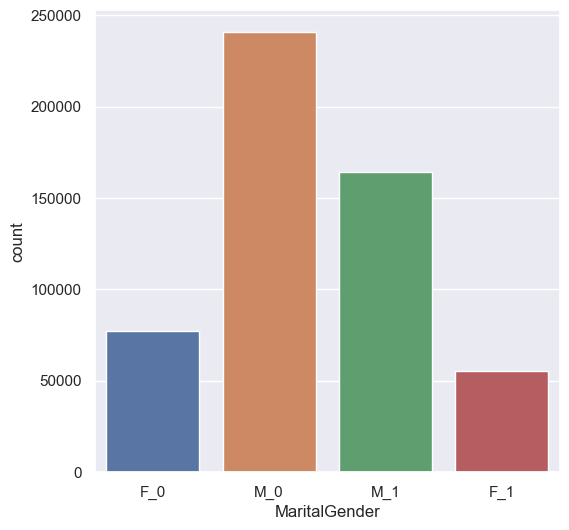

In [160]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

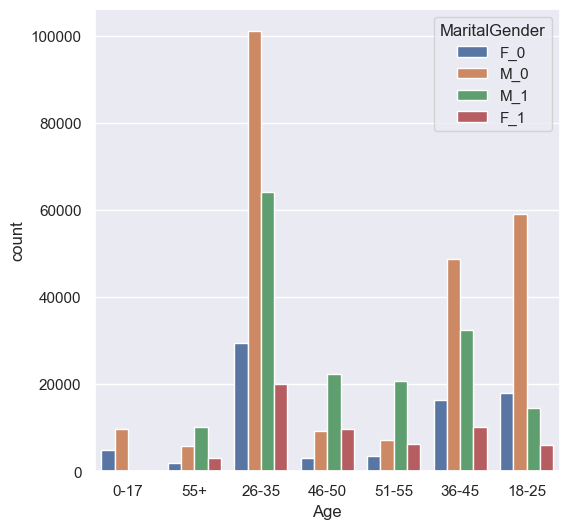

In [161]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

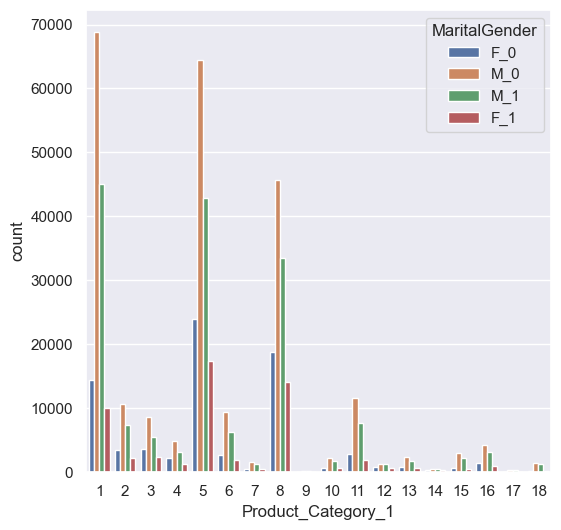

In [162]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

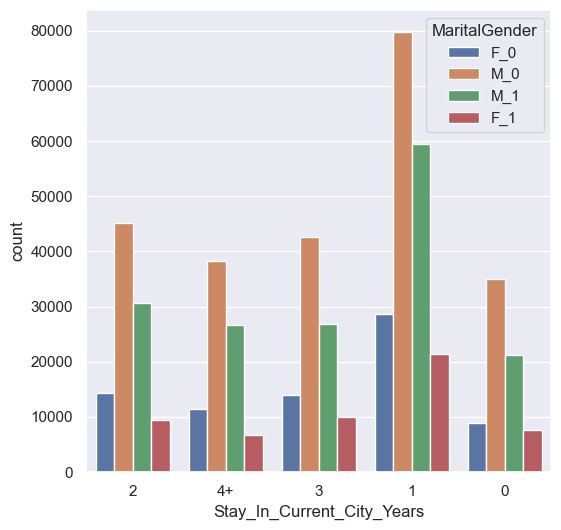

In [163]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

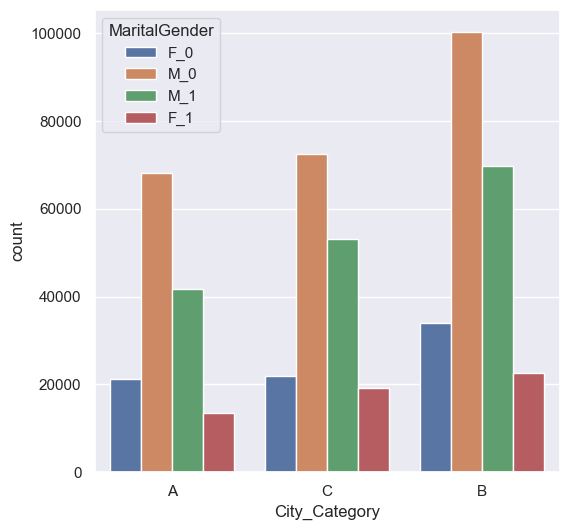

In [164]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])